# Content List
### 01. Importing libraries
### 02. Step 1: Importing data
### 03. Step 2: Create a bar chart, a histogram, a scatterplot, and a line chart
### 04. Step 3: Provide descriptive findings about sales. Create histogram of "order_hour_of_day" column
### 05. Step 4: Create a bar chart from the "loyalty_flag" column
### 06. Step 5: Check whether there's a difference in expenditure depending on the hour of the day.
### 07. Step 6: Create a line chart exploring the connections between age and number of dependents.
### 08. Step 7: Create a scatterplot to see age vs. spending power (income)
### 09. Step 8: Export visualizations as .png files in relevant project folder.

# 01. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Step 1: Importing data

In [3]:
# create path to main project folder
path = r'/Users/kirstinhelgeson/Desktop/Data Analytics Course/05-2023 Instacart Basket Analysis'

In [4]:
# import customers_ords_prods_merged.pkl dataframe
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods_merged.pkl'))

In [23]:
# check imported df_merge dataframe
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [24]:
# check the size of df_merge dataframe
df_merge.shape

(32404859, 31)

In [25]:
# check column titles for df_merge dataframe
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_days            object 
 15  busiest_period_of_day   object 
 16  max_order               int64  
 17  loyalty_flag            object 
 18  mean_price              float64
 19  spending_flag           object 
 20  median_days             float64
 21  frequency_flag          objec

# 03. Step 2: Create a bar chart, a histogram, a scatterplot, and a line chart.

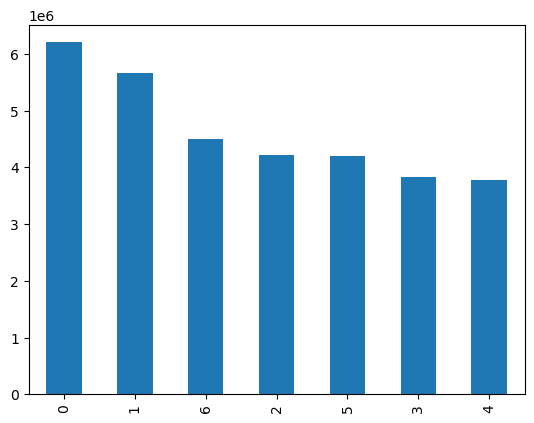

In [8]:
# create bar chart for order_day_of_week column
bar_1 = df_merge['orders_day_of_week'].value_counts().plot.bar()

In [10]:
frequency = df_merge['orders_day_of_week'].value_counts()
print(frequency)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64


Text(0, 0.5, 'Order Count (Millions)')

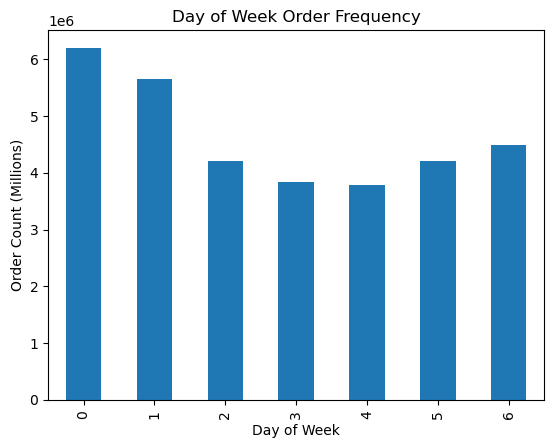

In [13]:
# sort bar chart by index order least to greatest
bar_2 = df_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Day of Week Order Frequency')
plt.xlabel('Day of Week')
plt.ylabel('Order Count (Millions)')

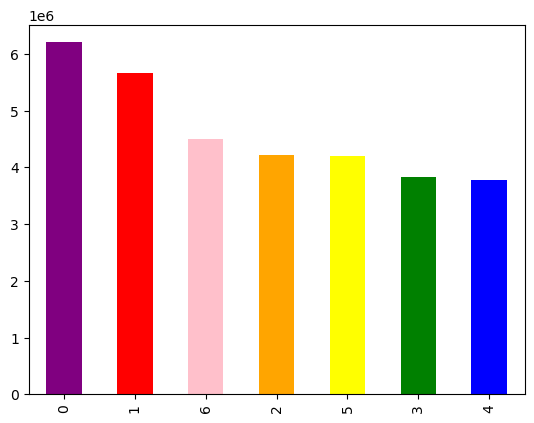

In [10]:
# change colors of the bar chart
bar_3 = df_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

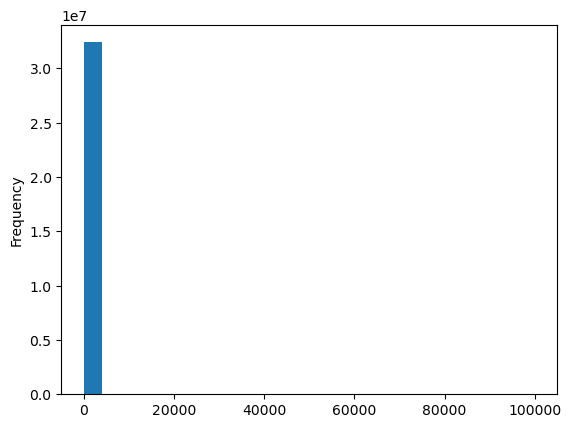

In [26]:
# create histogram for 'prices' column with 25 bins
hist_1 = df_merge['prices'].plot.hist(bins = 25)

In [12]:
# show descriptive analysis of "prices" column
df_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
# check max of "prices" column
df_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

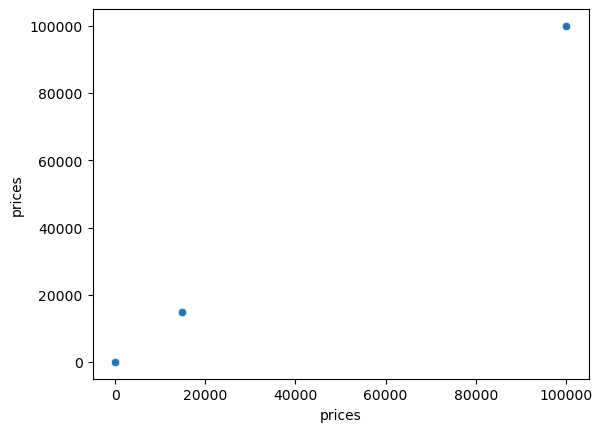

In [14]:
# create scatterplot to see any outliers visually
sns.scatterplot(x = 'prices', y = 'prices', data = df_merge)

In [15]:
# check data for specific outliers, choosing the maximum price of an object at a supermarket to be $100
df_merge.loc[df_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [16]:
# turns these outliers into NaNs since they are likely error values
df_merge.loc[df_merge['prices']>100, 'prices'] = np.nan

In [17]:
# check new maximum now that outliers have been relabeled NaNs
df_merge['prices'].max()

25.0

Text(0.5, 0, 'Hour of Day')

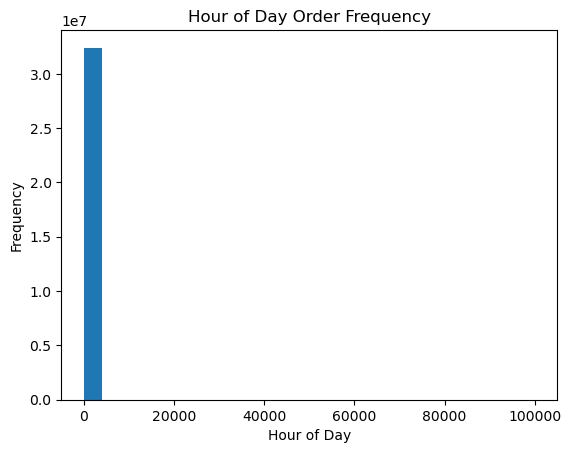

In [19]:
# make histogram for 'prices' column with 25 bins with corrected data
hist_1 = df_merge['prices'].plot.hist(bins = 25)

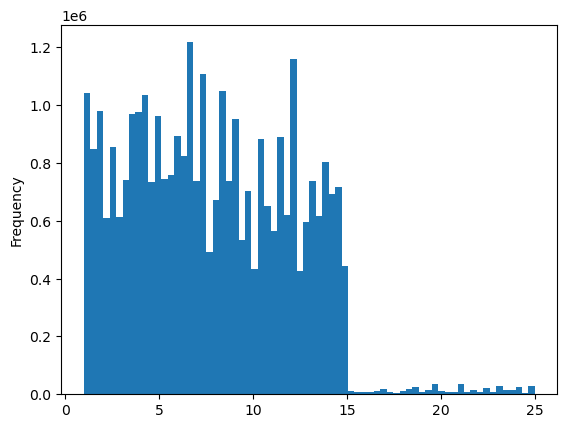

In [19]:
# increase granularity, create histogram for 'prices' column with 70 bins
hist_2 = df_merge['prices'].plot.hist(bins = 70)

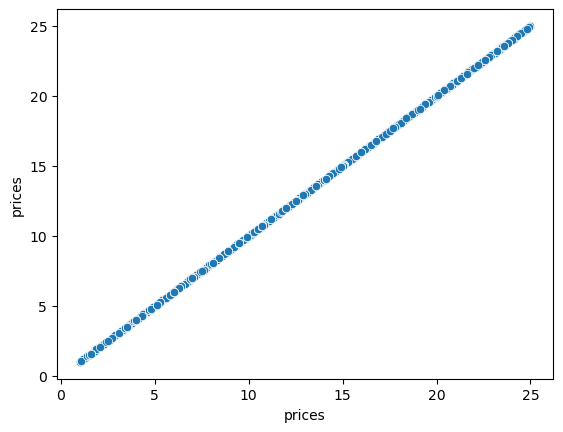

In [20]:
# create scatterplot of the 'prices' column
scatter = sns.scatterplot(x = 'prices', y = 'prices', data = df_merge)

In [23]:
# create a 70/30 sampling of the df_merge dataframe
np.random.seed(4)
dev = np.random.rand(len(df_merge)) <= 0.7

In [24]:
# print list of randomized True and False values
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
# check the size of the array
dev.shape

(32404859,)

In [27]:
# store dataframe into two samples, 70% in "big" sample and 30% in "small" sample
big = df_merge[dev]
small = df_merge[~dev]

In [28]:
# check the length of the sum of the two samples to see if it matches df_merge size
len(big) + len(small)

32404859

In [29]:
# create another dataframe to include only 'orders_day_of_week' and 'prices' from the small sample space
df_merge_2 = small[['orders_day_of_week','prices']]

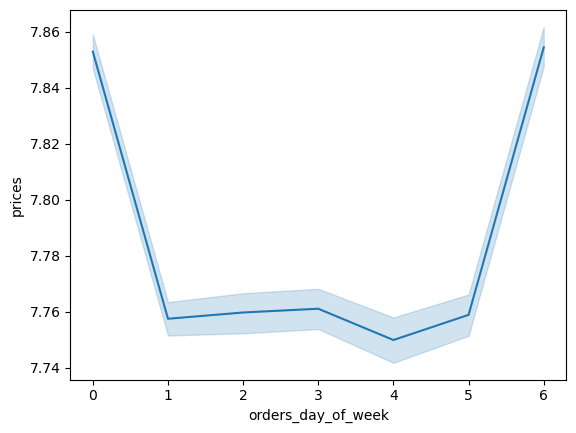

In [30]:
# create a line graph using dataframe made from the small sample space
line = sns.lineplot(data = df_merge_2, x = 'orders_day_of_week', y = 'prices')

# 04. Step 3: Provide descriptive findings about sales. Create a histogram of the "order_hour_of_day" column.

In [5]:
value_counts = df_merge['order_hour_of_day'].value_counts()
print(value_counts)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64


Text(0, 0.5, 'Order Count (Millions)')

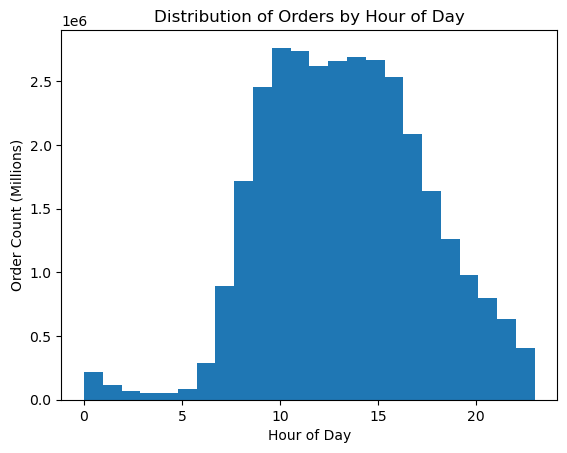

In [6]:
# create histogram for "order_hour_of_day" column with 24 bins since there are 24 hours a day
hist_3 = df_merge['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Order Count (Millions)')

### hist_3 shows the frequency of customers throughout the day. The lowest frequency is between hours 0 - 6. Frequency starts to increase between hours 7 - 9. Peak hours are 10 - 16. After hours 16 the frequency drops off consistently each hour until hour 23.

# 05. Step 4: Create a bar chart from the "loyalty_flag" column for marketing team to see distribution of orders among customers in terms of loyalty.

Text(0, 0.5, 'Count of Customers (Millions)')

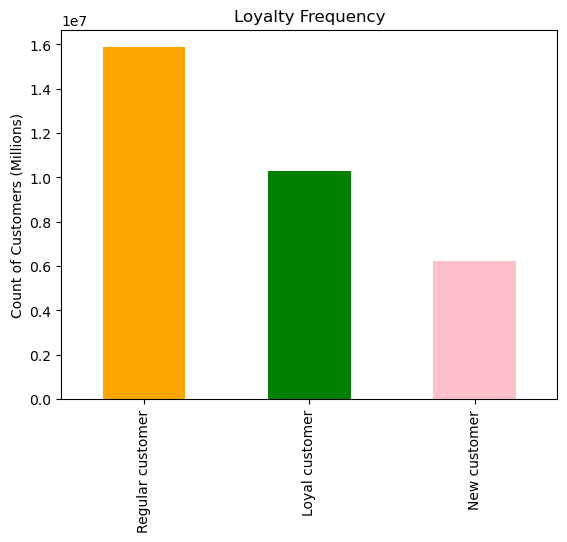

In [15]:
# create bar chart to measure loyalty_flag frequencies
bar_4 = df_merge['loyalty_flag'].value_counts().plot.bar(color=['orange', 'green','pink'])
plt.title('Loyalty Frequency')
plt.ylabel('Count of Customers (Millions)')

# 06. Step 5: Check whether there's a difference in expenditure depending on the hour of the day.

In [34]:
# create dataframe for line chart to determine if there's a difference in expenditure between hour of day and prices
df_line = small[['order_hour_of_day','prices']]

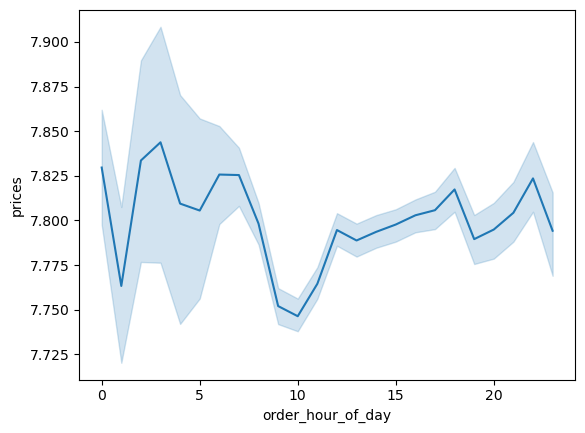

In [35]:
# create line chart using df_line subset
line_2 = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')
plt.title('')

# 07. Step 6: Determine whether there's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [36]:
# create dataframe for a line chart to determine if there is a connection between age and number of dependants
df_line_2 = small[['Age','n_dependants']]

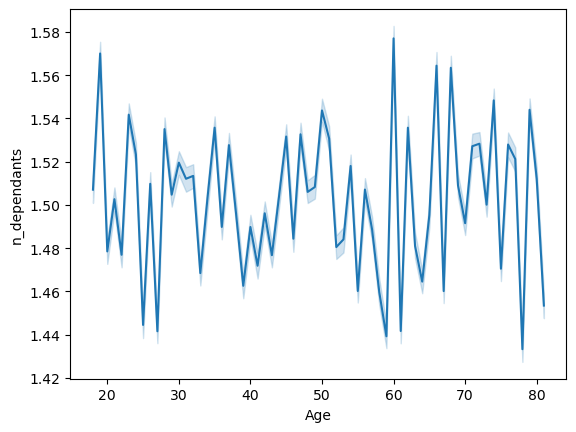

In [37]:
# create line chart
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y = 'n_dependants')

### There is not a distinct connection between age and number of dependants. The 20s age group is erratic, which makes sense. Same for the 30s age group. These are particular time periods where people determine if they want children or not. The 40s age group has a generally upward trend, perhaps because parents still have dependants in post-secondary school and this could determine what they are more likely to shop for. Likewise, there is a large spike at age 60 probably because elderly parents become the dependants of their remaining children, which might change what people shop for. But there are no strong correlations to determine anything for sure.

# 08. Step 7: To visualize the relationship between age and spending power (income), create a scatterplot.

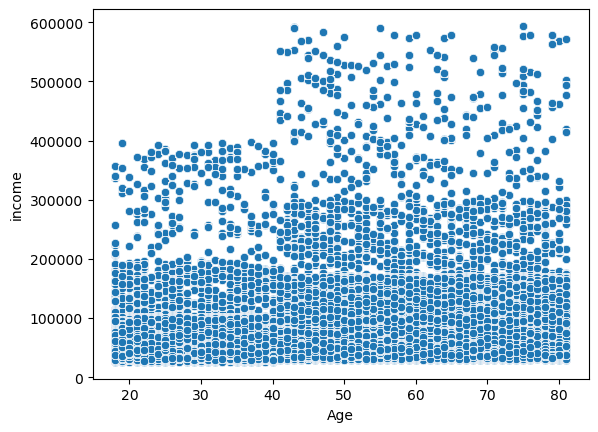

In [38]:
# create scatterplot to determine if there is a connection between age and spending power(income)
scatter_2 = sns.scatterplot(x = 'Age', y = 'income', data = df_merge)

### The majority across all age groups ten to make under 200K. Around 40+, more people are making up to 300K. While there are some people under 40 who make up to 400K, no one under 40 makes 400K - 600K. Only some people 40+ make up to 600K. The main observation that is clear here is that income tends to increase around age 40.

# 09. Step 8: Export visualizations as .png files in relevant project folder.

In [39]:
# export bar_1 for order_day_of_week column
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [14]:
# export bar_2 for order_day_of_week column
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_index.png'))

In [41]:
# export bar_3 for order_day_of_week column
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_color.png'))

In [42]:
# export hist_1 for prices column
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25.png'))

In [43]:
# export hist_2 for prices column
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70.png'))

In [45]:
# export scatterplot "scatter" of the prices column
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [46]:
# export line chart of prices vs order_day_of_week
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_dow.png'))

In [7]:
# export hist_3 for order_hour_of_day column
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

In [11]:
# export bar_4 for loyalty frequency
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [49]:
# export line_2 chart to determine if there's a difference in expenditure between hour of day and prices
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'))

In [50]:
# export line_3 chart to determine if there's a connection between age and number of dependants
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dep.png'))

In [51]:
# export scatterplot "scatter_2" to determine if there's a connection between age and spending power
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))